<a href="https://colab.research.google.com/github/zzalexey/Final-Work/blob/main/FW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Загрузите файл HR.csv в pandas dataframe

In [ ]:
# Файл данных доступен доступен тут Файл доступен тут https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
hr  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/FW/HR.csv')
#hr  = pd.read_csv('https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing/HR.csv')
hr.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# три последних переменых бинарные(0,1), для них среднее - это доля едениц
# пропущенных значений нет, максимум и минимум выглядят естественно, сторее всего выбросов нет

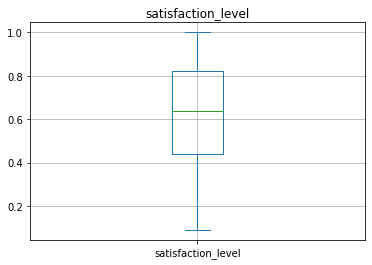

In [ ]:
hr['satisfaction_level'].plot(kind='box',
                   title='satisfaction_level', grid=True)


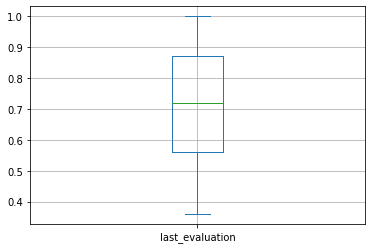

In [ ]:
hr['last_evaluation'].plot(kind='box', grid=True)


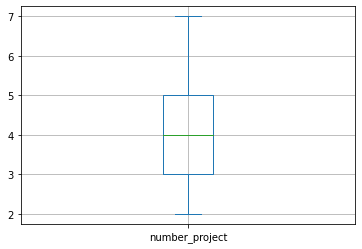

In [ ]:
hr['number_project'].plot(kind='box', grid=True)

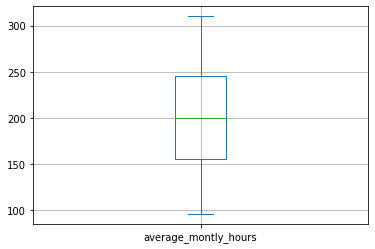

In [ ]:
hr['average_montly_hours'].plot(kind='box', grid=True)

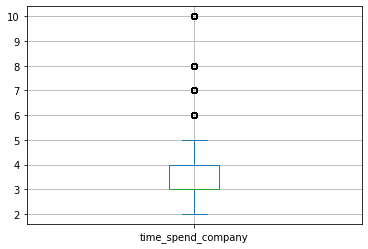

In [ ]:
hr['time_spend_company'].plot(kind='box', grid=True)

In [ ]:
# желательно проверить 6-10 летний стаж, например сравнить с датой образования компании

# моды:

In [ ]:
# моды:
import statistics
for col_name, data in hr.items():
	print("переменная:",col_name, "\nмода:",data.mode())

переменная: satisfaction_level 
мода: 0    0.1
dtype: float64
переменная: last_evaluation 
мода: 0    0.55
dtype: float64
переменная: number_project 
мода: 0    4
dtype: int64
переменная: average_montly_hours 
мода: 0    135
1    156
dtype: int64
переменная: time_spend_company 
мода: 0    3
dtype: int64
переменная: Work_accident 
мода: 0    0
dtype: int64
переменная: left 
мода: 0    0
dtype: int64
переменная: promotion_last_5years 
мода: 0    0
dtype: int64
переменная: department 
мода: 0    sales
dtype: object
переменная: salary 
мода: 0    low
dtype: object


In [ ]:
# разберемся с текстовыми переменными

In [ ]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
# категориальная переменная
# рассичтаем моду
mo = statistics.mode(hr['department'])
print(f'Мода: {mo}')

Мода: sales


In [ ]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
#порядковая переменная
# дополнительно расчитаем моду
# можно было бы рассчитать медиану, но и она очевидна - medium
mo = statistics.mode(hr['salary'])
print(f'Мода: {mo}')

Мода: low


## 3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

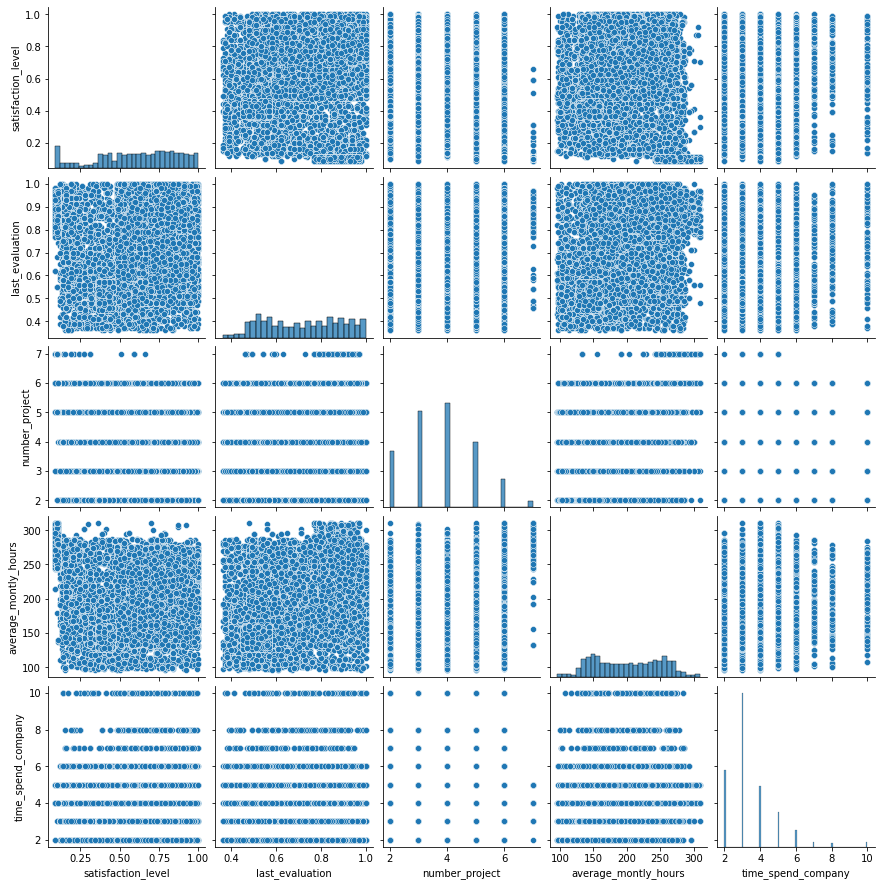

In [ ]:
import seaborn as sns
sns.pairplot(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])

In [ ]:
hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [ ]:
# сильных корреляций нет, ряд переменных скорее порядковый, чем непрерывный.
# применим корреляцию Спирмена
hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


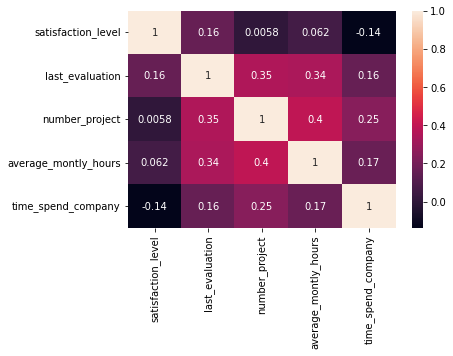

In [ ]:
sns.heatmap(hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(method='spearman'), annot = True)
plt.show()

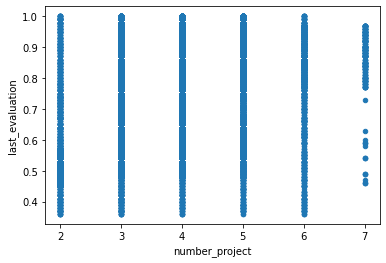

In [ ]:
# Самая высокая корреляция 0.350399: last_evaluation и number_project
# Самая низкая -0.005786: number_project и satisfaction_level
hr.plot(kind='scatter', x='number_project', y='last_evaluation')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'График разброса с точками по частоте')

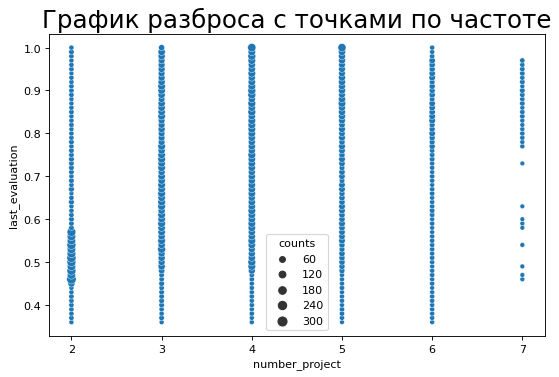

In [ ]:
import seaborn as sns
df_counts = hr.groupby(['number_project', 'last_evaluation']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(8,5), dpi= 80)    
sns.scatterplot(df_counts.number_project, df_counts.last_evaluation, size=df_counts.counts*2, ax=ax)
plt.title('График разброса с точками по частоте', fontsize=22)

In [ ]:
# те, кто выполнил 6 и 7 проектов, были оценены сравнотельно давно, видимо это "старослужащие", но таких не много
# 2 проекта это в основном сотрудники до 0,6 года

## 4 Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
# альтернативный способ
hr.groupby('department').count()[['last_evaluation']].head(20)

,last_evaluation
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


## 5 Показать распределение сотрудников по зарплатам. 

In [ ]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

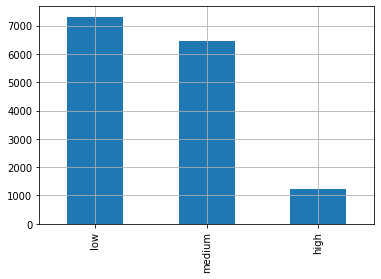

In [ ]:
hr['salary'].value_counts().plot(kind='bar', grid=True)

## 6 Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [ ]:
gr = hr.groupby(['department','salary']).size().reset_index(name='counts')
gr

,department,salary,counts
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [ ]:
gr["salary"] = gr["salary"].str.replace("low", "1 low")
gr["salary"] = gr["salary"].str.replace("medium", "2 low")
gr["salary"] = gr["salary"].str.replace("high", "3 high")
gr_sorted = gr.sort_values(by=['department', 'salary'])
gr_sorted

,department,salary,counts
1,IT,1 low,609
2,IT,2 low,535
0,IT,3 high,83
4,RandD,1 low,364
5,RandD,2 low,372
3,RandD,3 high,51
7,accounting,1 low,358
8,accounting,2 low,335
6,accounting,3 high,74
10,hr,1 low,335


In [ ]:
# в более читаемом виде
table = pd.pivot_table(gr_sorted,
               index=['salary'],
               values=['counts'],
               columns=['department'],
               aggfunc=[np.sum],
               fill_value=0)
table

sum                                                         \
           counts                                                          
department     IT RandD accounting   hr management marketing product_mng   
salary                                                                     
1 low         609   364        358  335        180       402         451   
2 low         535   372        335  359        225       376         383   
3 high         83    51         74   45        225        80          68   

                                    
                                    
department sales support technical  
salary                              
1 low       2099    1146      1372  
2 low       1772     942      1147  
3 high       269     141       201

## 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

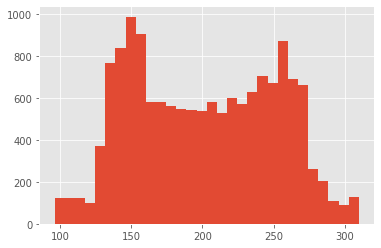

In [ ]:
# проверим нормальность распределений
plt.hist((hr['average_montly_hours']), bins=30);

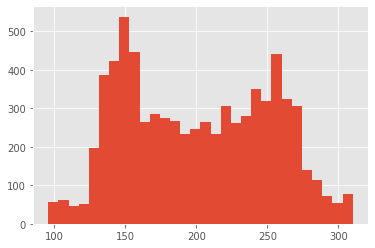

In [ ]:
# Явная бимодальность
# посмотрим по отдельности
plt.hist((hr[hr['salary'] == 'low']['average_montly_hours']), bins=30);

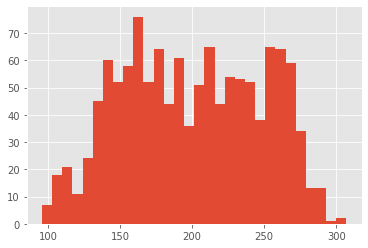

In [ ]:
plt.hist((hr[hr['salary'] == 'high']['average_montly_hours']), bins=30);

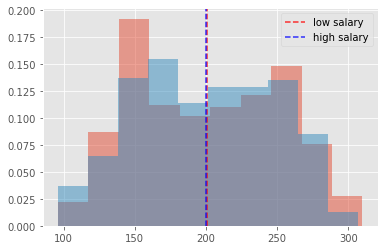

In [ ]:
x = hr[hr['salary'] == 'low']['average_montly_hours']
y = hr[hr['salary'] == 'high']['average_montly_hours']
x.name, y.name = 'low salary', 'high salary'    
    
    
x.hist(alpha=0.5, weights=[1./len(x)]*len(x))  
y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
plt.legend([x.name, y.name])

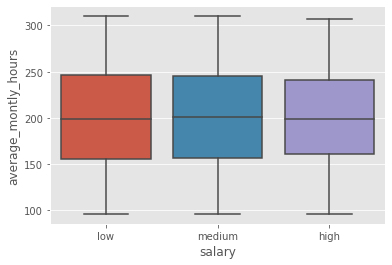

In [ ]:
# Интересная бимодальность - можно попробовать поискать факторы объясняющие бимодальность. 
# Например, для разных департаментов или числа проектов, но это выходит за рамки задачи.
sns.boxplot(
    x='salary',
    y='average_montly_hours',
    data=hr);

In [ ]:
# Визуально видно, что медианы, а скорее всего и средние не отличаются, применим критерий Мана-Уитни, так как нормальность не соблюдена
res = stats.mannwhitneyu(x, y, alternative="two-sided")
# "less", "greater" x>y или x<y
print('p-value: {0}'.format(res[1]))

p-value: 0.8241330720858694


In [ ]:
# Гипотезу о раменстве распределений двух независимых выборок (медиан) не можем отвергнуть.
# Считаем верной гипотезу о равенстве двух независимых выборок (медиан) 
# То есть независимо от оклада сотрудники проводят одинаковое время на работе...вот негодяи!

## 8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
### Доля сотрудников с повышением за последние 5 лет
### Средняя степень удовлетворенности
### Среднее количество проектов

In [ ]:
# number_project
table2 = pd.pivot_table(hr,
               index=['left'],
               values=['promotion_last_5years', 'satisfaction_level','number_project'],
               aggfunc=[np.mean],
               fill_value=0)
print(table2)
table3 = pd.pivot_table(hr,
               index=['left'],
               values=['promotion_last_5years', 'satisfaction_level','number_project'],
               aggfunc=[np.std],
               fill_value=0)
print('\n\n\n')
print(table3)

               mean                                         
     number_project promotion_last_5years satisfaction_level
left                                                        
0          3.786664              0.026251           0.666810
1          3.855503              0.005321           0.440098




                std                                         
     number_project promotion_last_5years satisfaction_level
left                                                        
0          0.979884              0.159889           0.217104
1          1.818165              0.072759           0.263933


In [ ]:
# среди уволившихся меньше удовлетворенность и доля повышений. 
# По числу проектов в среднем отличий не наблюдается, но станндартное отклонение у уволившихся в 2 раза больше.
# Возможно среди уволившихся есть 2 группы - не интересно работать (малое число выполненых проектов)
# и не оценили работу (большое число выполненых проектов)

### 9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [ ]:
#Предположения LDA
#● Нормальное распределение. Предполагается, что анализируемые
#переменные представляют выборку из многомерного нормального
#распределения. Отступление обычно не является критичным. - в данном случае условие не выполняется - есть бинарные переменные
#● Однородность дисперсий/ковариаций. Предполагается, что матрицы
#дисперсий/ковариаций переменных однородны. Как и ранее, малые
#отклонения не фатальны - существенное отклонение
#● Слабая скоррелированность признаков - да, корреляции не высоки

In [ ]:
#выполним задачу напрямую, получив максимальную, но возможно сверхпараметрехованную мождель.
#затем рассмотрим выполнение предположений модели и значимость предикторов с цлью сокращения модели
data = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]
data_class = hr['left']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25,random_state=88)

print(f'Размер обучающей выбрки: {len(y_train)}')
print(f'Размер тестовой выбрки: {len(y_test)}')

Размер обучающей выбрки: 11249
Размер тестовой выбрки: 3750


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7666666666666667

In [ ]:
y_test.value_counts()

0    2846
1     904
Name: left, dtype: int64

In [ ]:
# В случае предсказания по моде, мы бы угадали в 2846/3750 = 75,89%;
# А по LDA угадывает в 76% - различия нет. Модель не явлется качественнй;

In [ ]:
#pred = pd.DataFrame([y_test,lda.predict(X_test)]).T
#pred.value_counts()
pred = pd.DataFrame([lda.predict(X_test)]).T.value_counts()
pred

0    3322
1     428
dtype: int64

In [ ]:
# Попробуем масштабировать данные и запустить алгоритм еще разок!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#v_1_scaled = scaler.fit_transform(data_cut['sepal length (cm)'].reshape(-1, 1))
#v_1_scaled
#v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
#v_2_scaled
hr_cut_z = scaler.fit_transform(data)
type(hr_cut_z)

numpy.ndarray

In [ ]:
df_cut_z = pd.DataFrame(hr_cut_z, columns = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years'])
df_cut_z.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412


In [ ]:
df_cut_z.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,-1.789799e-17,-4.257767e-16,-4.071089e-18,-4.978720e-16,-6.144617e-15,5.792368e-15,1.110996e-14
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.102922e+00,-2.080478e+00,-1.462863e+00,-2.103471e+00,-1.026126e+00,-4.111653e-01,-1.474118e-01
25%,-6.951648e-01,-9.120042e-01,-6.515376e-01,-9.020633e-01,-3.412352e-01,-4.111653e-01,-1.474118e-01
50%,1.092680e-01,2.277508e-02,1.597876e-01,-2.103137e-02,-3.412352e-01,-4.111653e-01,-1.474118e-01
75%,8.332576e-01,8.991306e-01,9.711129e-01,8.800240e-01,3.436553e-01,-4.111653e-01,-1.474118e-01
max,1.557247e+00,1.658639e+00,2.593763e+00,2.181549e+00,4.452998e+00,2.432112e+00,6.783716e+00


In [ ]:
data_class = hr['left']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cut_z, data_class, test_size=0.25)

print(f'Размер обучающей выбрки: {len(y_train)}')
print(f'Размер тестовой выбрки: {len(y_test)}')

Размер обучающей выбрки: 11249
Размер тестовой выбрки: 3750


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7738666666666667

In [ ]:
# Сила модели немного увеличилась, но все равно осралась на уровне предсказания по модальной категории
# надо рассмотреть другие методы - логистическую регрессию, леревья классификации, перцептрон